<a href="https://colab.research.google.com/github/PStettler/DSF-DCBP-Philip-Stettler/blob/main/codingTask1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/DataScienceFundamentals2022/4ms_10 av_30 s_Absorbance_10-32-04-868 (1).txt'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Task 1: Write a method (function) which removes the header information in the datafile and saves that information into a separate textfile. [0.5 points]

In [14]:
numberOfTextRows = 13
def import_metadata(textLines = numberOfTextRows, path = path):
  import pandas as pd
  metadata = str(pd.read_csv(path, delimiter='\t',nrows=textLines-1, header = None))
  with open('metadata.txt', 'w') as outstream:
    outstream.write(metadata)
  

In [82]:
import_metadata()

In [83]:
with open('metadata.txt', 'r') as instream:
     textlines = instream.readlines()
for i in range(numberOfTextRows):
     print(textlines[i])

                                                    0

0   Data from 4ms_10 av_15 s_Absorbance_10-32-04-8...

1                 Date: Thu Oct 25 10:32:04 CEST 2018

2                                     User: Christoph

3                              Spectrometer: BALLMOOS

4                                     Trigger mode: 4

5                 Integration Time (sec): 4.000000E-3

6                                Scans to average: 10

7              Electric dark correction enabled: true

8              Nonlinearity correction enabled: false

9                                     Boxcar width: 0

10                            XAxis mode: Wavelengths

11                 Number of Pixels in Spectrum: 3648


Task 2: Write a function which reduces the data resolution by averaging over 1, 2, 3 and 4 nm wavelengths. Save these 4 new reduced datasets in new files. Do this (1) by writing an explicit loop and (2) by using pandas methods. Measure the running times of the two approaches. [6 points]

In [90]:
import pandas as pd
df = pd.read_csv(path, delimiter = '\t', header= 13)

def reduce(data = df, step = 4):
  jump = round(step/0.1355)
  df_means = pd.DataFrame()
  for i in range(2,len(data.columns)-jump,jump):
    df_means[data.columns[i][0:3]] = (data.iloc[:, range(i,i+jump-1)].mean(axis=1))
  return(df_means)



In [91]:
%%timeit -n 10 -r 5 
reduce(step=2).head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  


10 loops, best of 5: 207 ms per loop


Task 3: Write a function which takes two wavelengths as input and plots the difference of the data at these lengths over time. [2 points]

In [148]:
import numpy as np
import matplotlib.pyplot as plt
def difference(data = df, col1 = 2, col2 = 100):
  dif = df.iloc[:,col1].values - df.iloc[:,col2].values
  fig, ax = plt.subplots()
  ax.plot(df.iloc[:,1].values, dif,'o');
  plt.ylabel("difference");
  plt.xlabel("seconds");
  plt.title("The Title");
  plt.legend(['Data']);
  plt.savefig('pathToFilename.png')

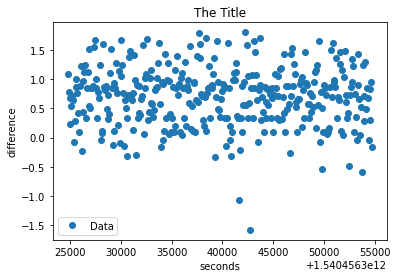

In [149]:
difference()

Plot the full and the reduced datasets in the same figure. Is there any visual difference? [2 points]

,Unnamed: 0,Unnamed: 1,316.6137,316.7492,316.8847,317.0203,317.1558,317.2913,317.4268,317.5623,...,778.9703,779.089,779.2076,779.3263,779.4449,779.5636,779.6822,779.8008,779.9194,780.0381
0,2018-10-25 10:32:04.789000,1540456324789,0.329672,0.329672,0.329672,0.090294,-0.716926,-1.829304,-0.686330,-0.428776,...,-0.038483,-0.039623,-0.036920,-0.037309,-0.037299,-0.037476,-0.036856,-0.036853,-0.039100,-0.035545
1,2018-10-25 10:32:04.878000,1540456324878,-0.044412,-0.044412,-0.044412,0.157632,-0.672423,-2.183981,-0.492421,-0.000000,...,-0.039428,-0.038486,-0.037309,-0.036357,-0.037289,-0.038728,-0.037214,-0.036902,-0.040210,-0.038165
2,2018-10-25 10:32:04.962000,1540456324962,0.338219,0.338219,0.338219,0.330993,-0.879836,-0.000000,-0.559845,-0.000000,...,-0.037725,-0.037534,-0.036560,-0.036152,-0.036554,-0.036875,-0.037351,-0.036746,-0.038686,-0.036903
3,2018-10-25 10:32:05.046000,1540456325046,-0.049682,-0.049682,-0.049682,0.519086,-0.681150,-0.000000,-0.417230,-0.000000,...,-0.037613,-0.037168,-0.036369,-0.034549,-0.036252,-0.037948,-0.036713,-0.035706,-0.038203,-0.036822
4,2018-10-25 10:32:05.129000,1540456325129,0.335086,0.335086,0.335086,-0.041393,-0.000000,-1.802774,-0.510417,-0.000000,...,-0.040919,-0.038288,-0.035840,-0.035638,-0.039504,-0.040093,-0.039953,-0.037656,-0.038082,-0.035900
